In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9ff9d2af0c774160b3af7624a62c1e74 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5Lj7J-07sagUrfakivdN3l9umoJw391GYw_rth1TAn8K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_9ff9d2af0c774160b3af7624a62c1e74.get_object(Bucket='financialriskmanagement-donotdelete-pr-d80yck528ne2la',Key='german_credit_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
#head() method is used to return top n (5 rows by default) rows of a datframe or series
data.head(10)#male-1 female-1  own-1 free-0  savings -little-0

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [4]:
#describe() method computes a summary of statistics like count, mean, standard deviation, min, max and quartile values.
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [5]:
#info() gives information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   818 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [6]:
data.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [7]:
data["Checking account"].fillna(data["Checking account"].mode()[0],inplace=True)
data["Saving accounts"].fillna(data["Saving accounts"].mode()[0],inplace=True)
data.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [8]:
data.to_csv("afterna.csv")

<AxesSubplot:>

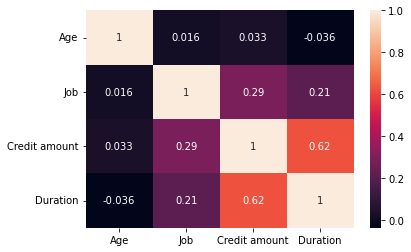

In [9]:
sns.heatmap(data.corr(), annot = True)

In [10]:
data.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


In [11]:
data['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [12]:
data.head(10)
#age=numerical
#gender=male-1 female-1
#job type=done
# housing- own-1 free-0,rent-2  
#savings -little-0, moderate-1 ,quite rich -2 rich -3
#checking-little-0,moderate-1,rich -2,
#credit amount -numerical
#duration=numerical
#purpose=radio/tv-

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,little,little,9055,36,education,good
6,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,little,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


<AxesSubplot:>

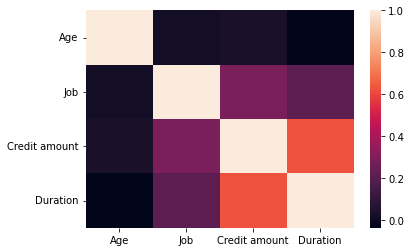

In [13]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels= corr.columns.values)

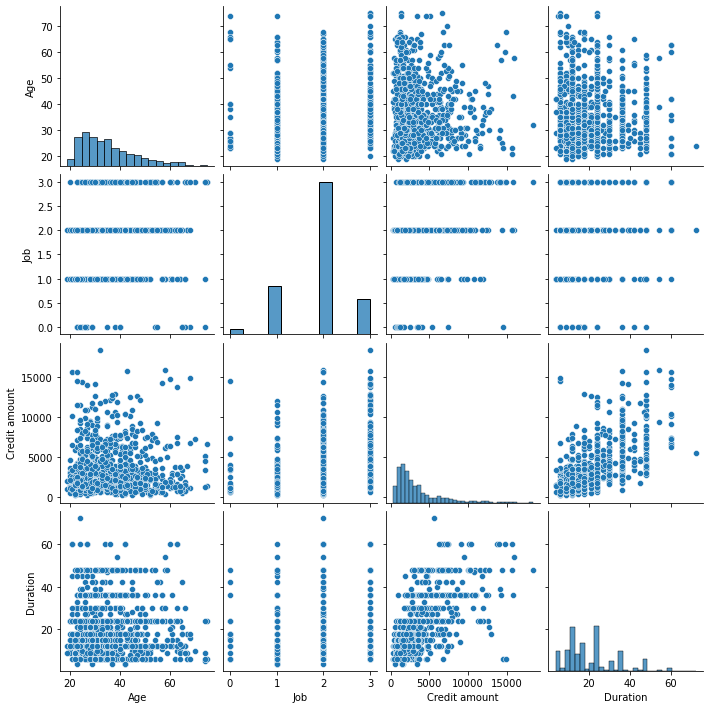

In [14]:
sns.pairplot(data=data, markers=["^","v"], palette="inferno")

<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

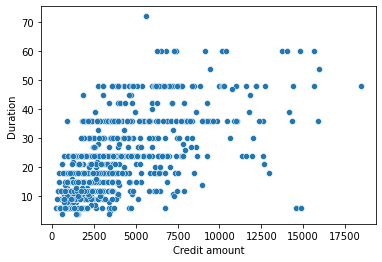

In [15]:
sns.scatterplot(x="Credit amount",y="Duration",data=data)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Sex"]=le.fit_transform(data["Sex"])
data["Housing"]=le.fit_transform(data["Housing"])
data["Checking account"]=le.fit_transform(data["Checking account"])
data["Purpose"]=le.fit_transform(data["Purpose"])
data["Duration"]=le.fit_transform(data["Duration"])
data["Saving accounts"]=le.fit_transform(data["Saving accounts"])

In [17]:
data.shape

(1000, 10)

In [18]:
data.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,2,5,good
1,22,0,2,1,0,1,5951,29,5,bad
2,49,1,1,1,0,0,2096,8,3,good
3,45,1,2,0,0,0,7882,26,4,good
4,53,1,2,0,0,0,4870,17,1,bad
5,35,1,1,0,0,0,9055,23,3,good
6,53,1,2,1,2,0,2835,17,4,good
7,35,1,3,2,0,1,6948,23,1,good
8,61,1,1,1,3,0,3059,8,5,good
9,28,1,3,1,0,1,5234,21,1,bad


In [19]:
data.to_csv("encod.csv")

In [20]:
x=data.drop('Risk',axis=1)
y=data["Risk"]

In [21]:
x.shape

(1000, 9)

In [22]:
y

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: Risk, Length: 1000, dtype: object

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state= 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [25]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear")
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [26]:
svm

SVC(kernel='linear')

In [27]:
y_pred2 = svm.predict(x_test)

In [28]:
y_pred2

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
      

In [29]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test,y_pred2)

In [30]:
print("accuracy of SVM",acc1*100)

accuracy of SVM 71.0


In [31]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred2)

In [32]:
cm1

array([[  0,  58],
       [  0, 142]])

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtrcv=DecisionTreeClassifier(criterion='entropy',max_depth=3,
 min_samples_leaf= 7,
 min_samples_split= 2,
 splitter='best')
dtrcv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 84,criterion = "entropy")
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=84)

In [35]:
y_pred = dtrcv.predict(x_test)

In [36]:
y_pred

array(['good', 'good', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', '

In [37]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_test,y_pred)

In [38]:
print("accuracy of Decision Tree",acc2*100)

accuracy of Decision Tree 66.0


In [39]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,y_pred)

In [40]:
cm2

array([[  9,  49],
       [ 19, 123]])

In [41]:
import pickle
pickle.dump(svm,open("risk.pkl", "wb"))
#pickle.dump(dtrcv,open("risk.pkl","wb"))

In [42]:
pip install ibm_watson_machine_learning

Note: you may need to restart the kernel to use updated packages.


In [43]:
from ibm_watson_machine_learning import APIClient

wml_credentials={
    "url": "https://us-south.ml.cloud.ibm.com", 
    "apikey":"mNchOQo_3dIJ3QGdbWaZbzeCZ3lB8b1bg85GI1c7s647" }

client= APIClient (wml_credentials)
print(client)

In [53]:
def guid_from_space_name(client, space_name):
    space= client.spaces.get_details() 
    #print(space) 
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name) ['metadata']['id'])


In [54]:
space_uid=guid_from_space_name(client, 'models')

print("Space UID=" + space_uid)

Space UID=ebd91d9b-216c-4f76-8ce6-7fc73e43b0d9


In [46]:
client.set.default_space(space_uid)

'SUCCESS'

In [47]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [48]:
import sklearn
sklearn.__version__

'1.0.2'

In [49]:
software_spec_uid= client.software_specifications.get_uid_by_name("default_py3.7") 
software_spec_uid

'e4429883-c883-42b6-87a8-f419d64088cd'

In [67]:
model_details =client.repository.store_model(model=svm, meta_props={
    client.repository.ModelMetaNames.NAME: "frm",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0.2",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid }
                                            )


Traceback (most recent call last):
  File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 254, in _save_scikit_pipeline_model
    model_artifact = self._create_pipeline_model(artifact, query_param)
  File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 514, in _create_pipeline_model
    model_artifact = self._create_pipeline_model_v4_cloud(model_artifact, query_param)
  File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 1005, in _create_pipeline_model_v4_cloud
    model_output = self.repository_api.ml_assets_model_creation_v4_cloud(model_input, query_param,headers)
  File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/libs/repo/swagger_client/apis/repository_api.py", line 301,

WMLClientError: Publishing model failed.
Reason: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Thu, 20 Oct 2022 14:03:41 GMT', 'Content-Type': 'application/json', 'Content-Length': '284', 'Connection': 'keep-alive', 'server-timing': 'intid;desc=83291b3f88852359, intid;desc=83291b3f88852359', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '75d24c5d7db7e401-DFW'})
HTTP response body: {
  "trace": "41dc500777f17f4994c2fb3063732c95",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported model type 'scikit-learn_1.0.2'",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}


In [2]:
model_id=client.repository.get_model_uid(model_details)

NameError: name 'client' is not defined

In [3]:
model_id

NameError: name 'model_id' is not defined

In [4]:
x_train[0]

NameError: name 'x_train' is not defined

In [5]:
svm.predict([[-0.50870719,  0.65075921,  0.15249857, -2.02776258,  0.76022772,
        0.99938585, -0.13370848,  1.25172967, -0.93565928]])

NameError: name 'svm' is not defined